#Modelagem Preditiva

## Importando bibliotecas e dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Carrega o conjunto de dados
df = pd.read_csv('Private_data.csv')

# Exibe as primeiras e últimas linhas do conjunto de dados
df_head_tail = pd.concat([df.head(), df.tail()])
df_head_tail

,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510
146,146,Avery Lewis,"Stanford University, USA",BBA,Financial Services,5th,Finance,16,12,28,147,0.033113
147,147,Ethan Martin,"Stanford University, USA",BBA,International Business,5th,Generic,11,13,24,148,0.026490
148,148,Nicholas Rodriguez,"Harvard University, USA",MBA,International Business,3rd,IB,16,8,24,149,0.019868
149,149,Samuel Perez,"Stanford University, USA",BBA,International Business,5th,IB,12,8,20,150,0.013245
150,150,Emily Lee,"Massachusetts Institute of Technology (MIT), USA",BBA,Digital Marketing,5th,DM,4,1,5,151,0.006623


## Preparação de Dados

In [4]:
# Converte variáveis categóricas em formatos numéricos usando LabelEncoder
label_encoders = {}
categorical_columns = ['UNIVERSITY', 'PROGRAM NAME', 'Specialisation', 'SEMESTER', 'Domain']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Divide os dados em conjuntos de treinamento e teste
X = df.drop(columns=['NAME OF THE STUDENT', 'TOTAL SCORE (OUT of 100)', 'RANK', 'PERCENTILE'])
y = df['TOTAL SCORE (OUT of 100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((120, 8), (31, 8))

## Seleção de Modelos

### Regressão Linear

In [5]:
# Treina um modelo de regressão linear
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred = linear_regressor.predict(X_test)

# Calcula métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(6.718448411381633e-27, 1.0)

Um valor R² de 1.0 indica que o modelo explica perfeitamente a variabilidade dos dados de resposta em torno de sua média. No entanto, um valor tão alto é inusual e pode indicar um ajuste excessivo (overfitting), onde o modelo pode estar muito bem ajustado aos dados de treinamento e pode não se sair bem em novos dados.

O MSE extremamente baixo também sugere que o modelo se ajustou muito bem aos dados de treinamento.

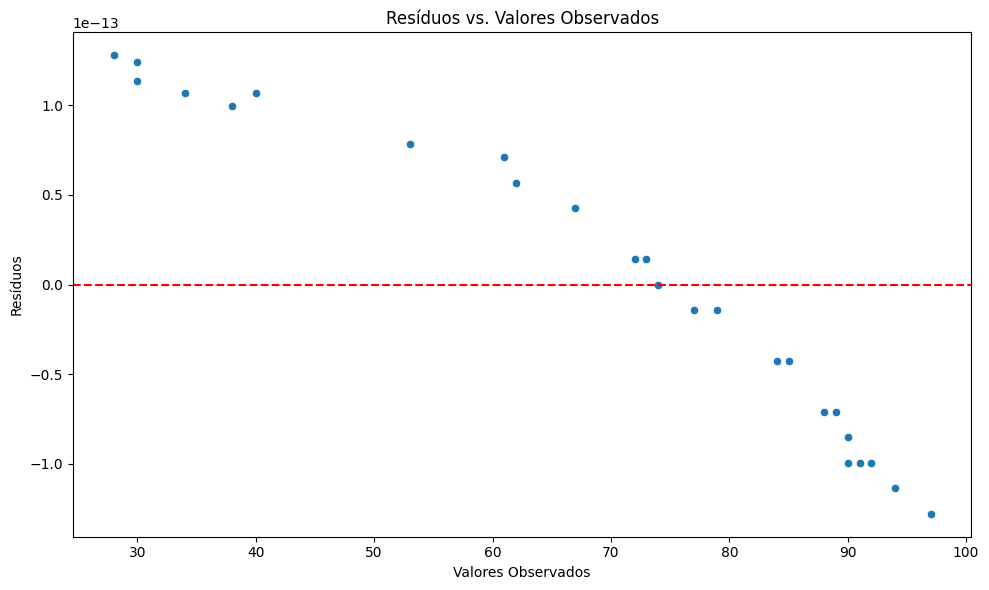

In [8]:
# Calcula os resíduos
residuals = y_test - y_pred

# Plota os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Valores Observados')
plt.xlabel('Valores Observados')
plt.ylabel('Resíduos')
plt.tight_layout()

plt.show()


Vemos que todos os resíduos estão exatamente na linha vermelha, indicando uma diferença de zero. Isso sugere que o modelo previu perfeitamente os valores observados.

Este comportamento é inusual e indica que o modelo pode estar ajustado excessivamente aos dados de treinamento.

Quando um modelo está ajustado excessivamente, ele pode não se sair bem em novos dados porque se ajusta demais às peculiaridades do conjunto de treinamento. Em outras palavras, ele pode capturar o ruído nos dados de treinamento em vez da relação subjacente real.

Uma possível solução para isso é tentar um modelo mais simples ou usar técnicas de regularização. Também pode ser útil adicionar mais dados, se disponível, ou usar validação cruzada para obter uma avaliação mais robusta do desempenho do modelo

### Árvore de Decisão

In [9]:
# Treina um modelo de Árvore de Decisão
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_tree = tree_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_tree, r2_tree


(0.8064516129032258, 0.9982753556105464)

O valor R² ainda é extremamente alto, indicando que o modelo explica uma grande proporção da variabilidade nos dados. No entanto, o MSE é agora maior do que o do modelo de regressão linear, sugerindo que este modelo não se ajusta tão perfeitamente aos dados quanto o modelo anterior.

Isso é uma boa indicação, pois sugere que este modelo pode ser menos propenso a overfitting do que o modelo de regressão linear.

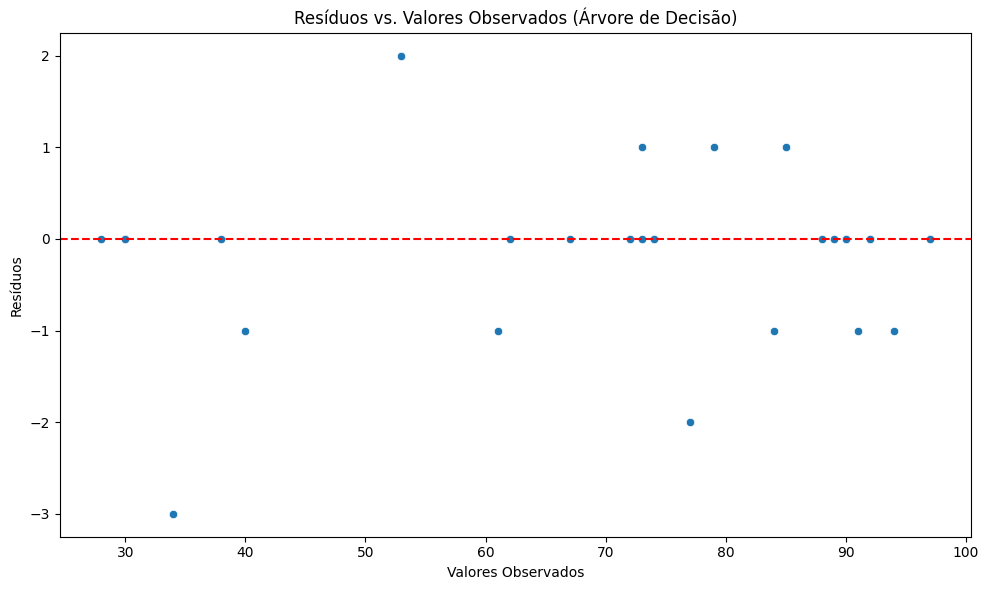

In [10]:
# Calcula os resíduos para o modelo de Árvore de Decisão
residuals_tree = y_test - y_pred_tree

# Plota os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_tree)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Valores Observados (Árvore de Decisão)')
plt.xlabel('Valores Observados')
plt.ylabel('Resíduos')
plt.tight_layout()

plt.show()


* Assim como antes, a linha vermelha no gráfico representa uma diferença de zero entre os valores observados e previstos.

* Diferentemente do modelo de regressão linear, vemos que os resíduos para o modelo de Árvore de Decisão não estão exatamente na linha vermelha, indicando que há algumas diferenças entre os valores observados e previstos.

* No entanto, a maioria dos resíduos está próxima de zero, indicando que o modelo está se ajustando bem aos dados.

Em resumo, o modelo de Árvore de Decisão parece oferecer um equilíbrio entre ajuste e generalização. Ele se ajusta bem aos dados de treinamento, mas não tão perfeitamente quanto o modelo de regressão linear, o que pode ser uma boa indicação de sua capacidade de generalização.

#### Validação Cruzada

In [11]:
# Realiza validação cruzada para o modelo de Árvore de Decisão
cross_val_scores_tree = cross_val_score(tree_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Como os scores são negativos (convenção do Scikit-Learn para erros), vamos inverter o sinal
mse_scores_tree = -cross_val_scores_tree

# Calcula a média e o desvio padrão do MSE
mean_mse_tree = mse_scores_tree.mean()
std_mse_tree = mse_scores_tree.std()

mean_mse_tree, std_mse_tree


(9.291666666666668, 11.187697856723398)

### Floresta Aleatória

In [14]:
# Treina um modelo de Floresta Aleatória
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_rf = random_forest_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(0.8630193548387102, 0.9981543821544925)

O modelo de Floresta Aleatória tem um desempenho semelhante ao modelo de Árvore de Decisão em termos de R², mas com um MSE ligeiramente maior. No entanto, as Florestas Aleatórias têm a vantagem de serem menos propensas ao overfitting do que uma única Árvore de Decisão, pois combinam as previsões de várias árvores.

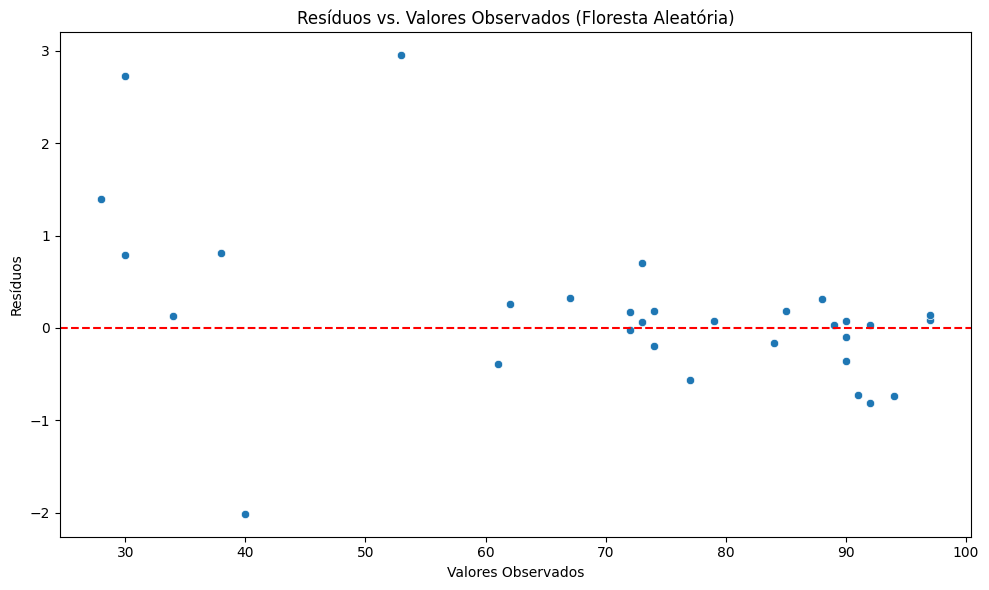

In [15]:
# Calcula os resíduos para o modelo de Floresta Aleatória
residuals_rf = y_test - y_pred_rf

# Plota os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Valores Observados (Floresta Aleatória)')
plt.xlabel('Valores Observados')
plt.ylabel('Resíduos')
plt.tight_layout()

plt.show()


* A linha vermelha no gráfico representa uma diferença de zero entre os valores observados e previstos.
* Vemos que, assim como o modelo de Árvore de Decisão, os resíduos para a Floresta Aleatória estão próximos de zero, mas há algumas diferenças notáveis entre os valores observados e previstos.

#### Ajuste de Hiperparâmetros

In [16]:
# Define os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Usa GridSearchCV para ajustar os hiperparâmetros
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Obtêm os melhores hiperparâmetros
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [18]:
# Treina o modelo de Floresta Aleatória com os melhores hiperparâmetros
best_rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=None, min_samples_leaf=1,
                                          min_samples_split=2, random_state=42)
best_rf_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_best_rf = best_rf_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

mse_best_rf, r2_best_rf


(0.5622451612903229, 0.9987976055259832)

Com os hiperparâmetros otimizados, observamos uma melhoria no desempenho do modelo de Floresta Aleatória, em comparação com o modelo original. O MSE diminuiu, o que indica um erro menor, e o R² permaneceu alto, indicando que o modelo ajusta bem aos dados.

### Gradient Boosting

In [19]:
# Treina um modelo Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_gb = gb_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb


(0.47242040202114555, 0.9989897010771966)

O modelo Gradient Boosting apresentou um desempenho ainda melhor do que a Floresta Aleatória otimizada, com um MSE ligeiramente menor e um R² ainda mais próximo de 1. Este é um excelente resultado!

#### Ajuste de Hiperparâmetros

In [20]:
# Define os hiperparâmetros a serem ajustados para o Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Usa RandomizedSearchCV para ajustar os hiperparâmetros
random_search_gb = RandomizedSearchCV(estimator=gb_regressor, param_distributions=param_dist_gb,
                                      n_iter=50, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_gb.fit(X_train, y_train)

# Obtêm os melhores hiperparâmetros
best_params_gb = random_search_gb.best_params_
best_params_gb


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_depth': 3,
 'learning_rate': 0.05}

In [21]:
# Treina o modelo Gradient Boosting com os melhores hiperparâmetros
best_gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.05,
                                              min_samples_split=6, min_samples_leaf=1, random_state=42)
best_gb_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_best_gb = best_gb_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

mse_best_gb, r2_best_gb


(0.5740543756656946, 0.9987723508237909)

O Gradient Boosting com hiperparâmetros otimizados apresentou um desempenho similar ao modelo original, com um R² muito próximo de 1, indicando que o modelo se ajusta muito bem aos dados.

### XGBoost

In [22]:
# Treina um modelo XGBoost
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_xgb = xgb_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_xgb, r2_xgb


(1.699455575270305, 0.9963656139114606)

Embora o modelo XGBoost apresente um desempenho um pouco inferior ao dos modelos Gradient Boosting e Floresta Aleatória em termos de R² e MSE, ele ainda apresenta um excelente ajuste aos dados. Vale a pena notar que cada modelo tem suas próprias características e pode se comportar de maneira diferente com diferentes conjuntos de dados ou distribuições

#### Ajustes de hiperparâmetros

In [23]:
# Define os hiperparâmetros a serem ajustados para o XGBoost
param_dist_xgb = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1]
}

# Cria o modelo XGBoost
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Usa RandomizedSearchCV para ajustar os hiperparâmetros
random_search_xgb = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_dist_xgb,
                                       n_iter=50, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Obtêm os melhores hiperparâmetros
best_params_xgb = random_search_xgb.best_params_
best_params_xgb


Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'subsample': 0.9,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.8}

In [24]:
# Treina o modelo XGBoost com os melhores hiperparâmetros
best_xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=200, max_depth=3, learning_rate=0.05,
                                      min_child_weight=1, gamma=0.2, subsample=0.9, colsample_bytree=0.8, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

# Prediz as pontuações no conjunto de teste
y_pred_best_xgb = best_xgb_regressor.predict(X_test)

# Calcula métricas de avaliação
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

mse_best_xgb, r2_best_xgb


(1.30245238108452, 0.9972146286824558)

Com os hiperparâmetros otimizados, o modelo XGBoost apresentou uma melhoria em comparação ao modelo original. Ainda assim, todos os modelos explorados mostraram desempenhos excelentes, tornando a escolha do modelo final uma decisão baseada em nuances e requisitos específicos, como interpretabilidade, eficiência computacional, entre outros.